# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

It has 17 campaings that occured between 05/2008 to 11/2010 corresponding to 79354 contacts.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [2]:
# Importing Basic Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd
import warnings
import plotly.express as px
import plotly.io as pio
warnings.filterwarnings('ignore')

# Importing Machine Learning Library
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

In [3]:
data_url = 'https://raw.githubusercontent.com/gputti/pcmlai_bank/refs/heads/main/bank-additional-full.csv'
df = pd.read_csv(data_url, sep = ';')

In [4]:
# describe data
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
# print data types of data
dtypes = pd.DataFrame(df.dtypes.rename('type')).reset_index().astype('str')
dtypes

,index,type
0,age,int64
1,job,object
2,marital,object
3,education,object
4,default,object
5,housing,object
6,loan,object
7,contact,object
8,month,object
9,day_of_week,object


In [6]:
# Take a look at target feature(column: y)
y = pd.get_dummies(df['y'], columns = ['y'], prefix = ['y'], drop_first = True)
y.sample(3)

,['y']_yes
590,False
8072,False
6179,False


In [7]:
positive_class = df[df['y'] == 'yes']
negative_class = df[df['y'] == 'no']

print('positive class shape', positive_class.shape)
print('negative class shape', negative_class.shape)
df['y'].value_counts(normalize=True)

positive class shape (4640, 21)
negative class shape (36548, 21)


,proportion
y,
no,0.887346
yes,0.112654


In [8]:
# replace 'yes' and 'no' values for y column with 1 and 0
df['y'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

looking at results, they are skewed. so accuracy is not a suitable evaluation metric.

In [10]:
# check for null values.
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [11]:
# now change column names to friendly names.
# replace '.' with '_' in column names.
df.columns = df.columns.str.lower().str.replace('.', '_')
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [12]:
# rename some of the column names
df.rename(columns={'poutcome': 'outcome'}, inplace=True)
df.rename(columns={'y': 'subscribed'}, inplace=True)
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'outcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'subscribed'],
      dtype='object')

In [13]:
df.sample(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,outcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,subscribed
22293,35,technician,single,professional.course,no,yes,yes,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
17478,55,admin.,divorced,university.degree,no,yes,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
1841,40,technician,married,university.degree,no,no,no,telephone,may,fri,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [14]:
# based on above description, we can safely drop duration column.
df.drop('duration', axis=1, inplace=True)
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'outcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx',
       'euribor3m', 'nr_employed', 'subscribed'],
      dtype='object')

In [15]:
# descrieb data
numerical_summary = df.describe()
numerical_summary

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,subscribed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [16]:
# lets do a correlation matrix of numerical features.
# create a dataframe with numberical columns.
df_num = df.select_dtypes(include='number')
df_num.sample(3)

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,subscribed
26503,31,1,999,0,-0.1,93.200,-42.0,4.076,5195.8,0
17391,43,2,999,0,1.4,93.918,-42.7,4.962,5228.1,1
32678,38,2,999,0,-1.8,92.893,-46.2,1.299,5099.1,0


In [17]:
# draw correlation matrix for numberic features
corr_matrix = df_num.corr()
corr_matrix

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,subscribed
age,1.000000,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
campaign,0.004594,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.034369,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914
previous,0.024365,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp_var_rate,-0.000371,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons_price_idx,0.000857,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons_conf_idx,0.129372,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.010767,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr_employed,-0.017725,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678
subscribed,0.030399,-0.066357,-0.324914,0.230181,-0.298334,-0.136211,0.054878,-0.307771,-0.354678,1.000000


In [18]:
# draw the correlation heat map using plotly and seaborn
fig = px.imshow(corr_matrix, text_auto=True, title='correlation matrix', )
fig.update_layout(width=800, height=800)
fig.show()

In [19]:
# observations
# age and campaign has less impact on target: subscribed

# lets see how age column distribution using histogram charts
df['age'].value_counts()[:5]

,count
age,
31,1947
32,1846
33,1833
36,1780
35,1759


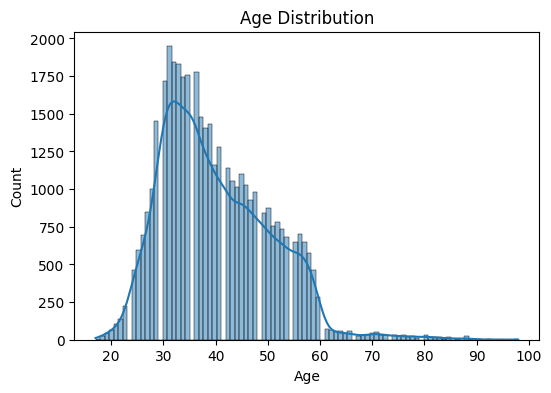

In [20]:
# draw histogram for age column using matplotlib and seaborn
plt.figure(figsize=(6,4))
sns.histplot(df['age'], multiple='stack', kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

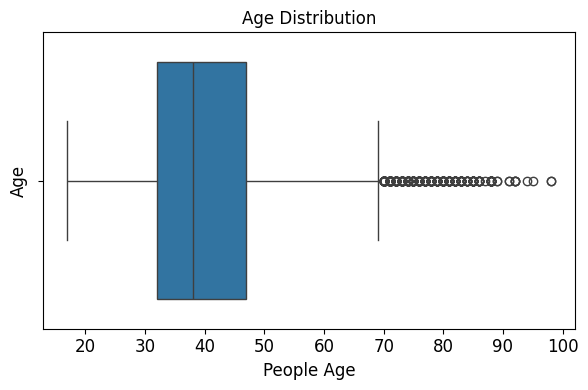

In [21]:
fig, (ax1) = plt.subplots(nrows = 1, ncols = 1, figsize = (6, 4))
sns.boxplot(x = 'age', data = df, orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=12)
ax1.set_ylabel('Age', fontsize=12)
ax1.set_title('Age Distribution', fontsize=12)
ax1.tick_params(labelsize=12)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [22]:
# check outliers for age
outlier_age =  df['age'].quantile(q = 0.75) + 1.5*(df['age'].quantile(q = 0.75) - df['age'].quantile(q = 0.25))
print(f'outlier for age column is: {outlier_age} ')
num_of_outliers = len(df[df['age'] > outlier_age])
print(f'number of outliers in age column is: {num_of_outliers}')
oulier_percentage = num_of_outliers / len(df) * 100
print(f'percentage of outliers in age column is: {oulier_percentage:.2f}%')

outlier for age column is: 69.5 
number of outliers in age column is: 469
percentage of outliers in age column is: 1.14%


In [23]:
# Before moving on to categorical features, lets take a look at 'pdays' feature.
# pdays represents the number of days since last contacted. 999 represents
# that contact was never reached out.
df['pdays'].value_counts()[:5]

,count
pdays,
999,39673
3,439
6,412
4,118
9,64


In [24]:
# as pdays value has no bearing on outcome, but either contacted or not
# contacted has, we will chae it to binary value.
# replace pdays column value with 0 for 999 and 1 for all other values.
df['contacted'] = df['pdays'].apply(lambda x: 0 if x == 999 else 1)
# drop the pdays column
df.drop('pdays', axis=1, inplace=True)
df['contacted'].value_counts()

,count
contacted,
0,39673
1,1515


In [25]:
# list diff types of categorical col names
# get categorical column summary
categorical_summary = df.describe(include='object')
categorical_summary

,job,marital,education,default,housing,loan,contact,month,day_of_week,outcome
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563


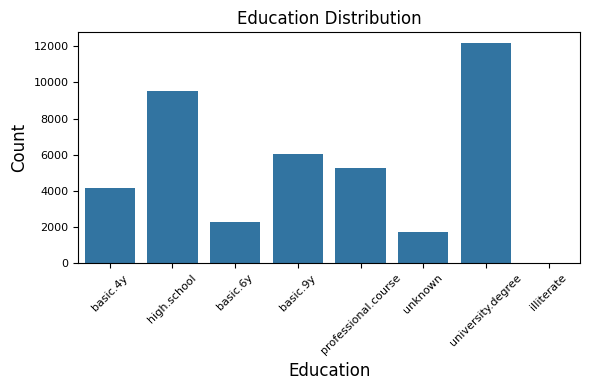

In [26]:
# Try to understand education using charts
fig, ax1 = plt.subplots(nrows = 1, ncols = 1, figsize = (6, 4))
sns.countplot(x = 'education', data = df, ax = ax1)
ax1.set_xlabel('Education', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.set_title('Education Distribution', fontsize=12)
ax1.tick_params(labelsize=8)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
# plt.subplots_adjust(wspace=0.5)
plt.tight_layout()


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

Business objective is to find out who will subscribe to term deposit. so it is classification problem. and by looking at subscribed col, we can say, data is imbalanced. so finding accuracy is not much use.

True positive - user subscribed
True negative - user not subscribed.
So having a False positive is detrimental, because we won't call user again.  But having False Negative, i.e. user subscribed, but model predicted, 'not subscribed'. this leads to a call to an already subscried user, but not harmful.
So effectively we should look for model with highest False negatives.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [27]:
# use LabelEncoder to encode categorical features.
label_encoder = LabelEncoder()
df['job'] = label_encoder.fit_transform(df['job'])
df['marital'] = label_encoder.fit_transform(df['marital'])
df['education'] = label_encoder.fit_transform(df['education'])
df['default'] = label_encoder.fit_transform(df['default'])
df['housing'] = label_encoder.fit_transform(df['housing'])
df['loan'] = label_encoder.fit_transform(df['loan'])
df['contact'] = label_encoder.fit_transform(df['contact'])
df['month'] = label_encoder.fit_transform(df['month'])
df['day_of_week'] = label_encoder.fit_transform(df['day_of_week'])
df['outcome'] = label_encoder.fit_transform(df['outcome'])
df.sample(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,outcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,subscribed,contacted
10577,32,10,2,3,1,0,0,1,4,3,11,0,1,1.4,94.465,-41.8,4.961,5228.1,0,0
20166,35,9,1,5,0,2,2,0,1,1,1,0,1,1.4,93.444,-36.1,4.965,5228.1,0,0
32986,56,7,2,0,1,2,0,0,6,1,2,0,1,-1.8,92.893,-46.2,1.299,5099.1,0,0


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [28]:
# lets remove target column and get all other data
X = df.drop('subscribed', axis=1)
y = df['subscribed']
X.shape, y.shape

((41188, 19), (41188,))

In [29]:
# find out the feature impporatance using Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)

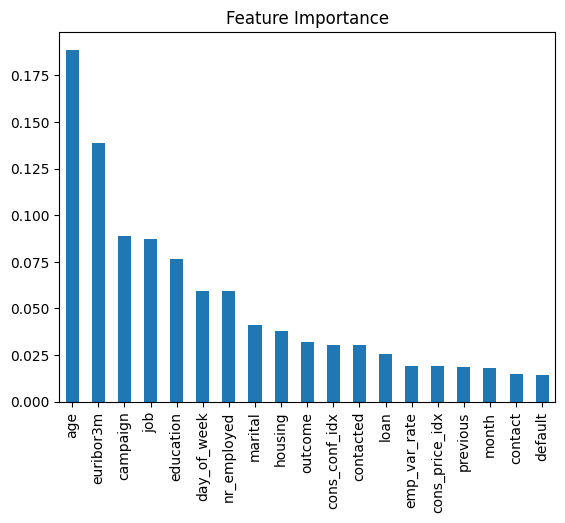

In [30]:
# draw a plot diagram
feature_importances.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance')
plt.show()

In [31]:
# now split data for train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [32]:
# get baseline from subscribed column
y_train.value_counts(normalize=True)[0].round(2)

0.89

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, cohen_kappa_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

scoring = 'accuracy'
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [42]:
## build LogisticRegression model and confusion matrix
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_scaled, y_train)
log_pred = log_reg_model.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, log_pred)
print(conf_matrix)
log_cv_score = (cross_val_score(log_reg_model, X_train, y_train, cv=k_fold, n_jobs=1, scoring = scoring )).mean()
print(f'cross validation score is: {log_cv_score}')

[[7190  113]
 [ 739  196]]
cross validation score is: 0.8933232169954476


In [43]:
# build KNeighborsClassifier and confusion matrix
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
knn_pred = knn_model.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, knn_pred)
print(conf_matrix)
knn_cv_score = cross_val_score(knn_model, X_train, y_train, cv=k_fold, n_jobs=1, scoring = scoring ).mean()
print(f'cross validation score is: {knn_cv_score}')

[[7074  229]
 [ 686  249]]
cross validation score is: 0.8868892261001518


In [44]:
# build SVC model and confusion matrix
svc = SVC()
svc.fit(X_train_scaled, y_train)
svc_pred = svc.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, svc_pred)
print(conf_matrix)
svc_cv_score = cross_val_score(svc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = scoring ).mean()
print(f'cross validation score is: {svc_cv_score}')

[[7166  137]
 [ 709  226]]
cross validation score is: 0.8875569044006071


In [45]:
# build DecisionTreeClassifier and confusion matrix
dtc = DecisionTreeClassifier()
dtc.fit(X_train_scaled, y_train)
dtc_pred = dtc.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, dtc_pred)
print(conf_matrix)
dtc_cv_score = cross_val_score(dtc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = scoring ).mean()
print(f'cross validation score is: {dtc_cv_score}')

[[6537  766]
 [ 616  319]]
cross validation score is: 0.8404248861911988


### Problem 9: Score the Model
What is the accuracy of your model?

In [48]:
# add all recall scores as pandas dataframe
score_df = pd.DataFrame({'model': ['log_reg_model', 'knn_model', 'svc', 'dtc'], 'recall': [log_cv_score, knn_cv_score, svc_cv_score, dtc_cv_score]})
score_df

,model,recall
0,log_reg_model,0.893323
1,knn_model,0.886889
2,svc,0.887557
3,dtc,0.840425


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

As already explained, recall is the best measure for this.
Because having FP is harmful to business and having FN is no harm, but annoying.
So having higher FN means lower Recall. So model with lowest Recall is what we want.

**Recall (OR True Positive Rate) = TP/(TP + FN)**


In [51]:
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score

print(f'KNN: \n',classification_report(y_test, knn_pred))

KNN: 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      7303
           1       0.52      0.27      0.35       935

    accuracy                           0.89      8238
   macro avg       0.72      0.62      0.65      8238
weighted avg       0.87      0.89      0.87      8238



In [52]:
print(f'LogisticRegression: \n',classification_report(y_test, log_pred))

LogisticRegression: 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      7303
           1       0.63      0.21      0.32       935

    accuracy                           0.90      8238
   macro avg       0.77      0.60      0.63      8238
weighted avg       0.88      0.90      0.87      8238



In [53]:
print(f'SVC: \n',classification_report(y_test, svc_pred))

SVC: 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      7303
           1       0.62      0.24      0.35       935

    accuracy                           0.90      8238
   macro avg       0.77      0.61      0.65      8238
weighted avg       0.88      0.90      0.88      8238



In [54]:
print(f'DecisionTreeClassifier: \n',classification_report(y_test, dtc_pred))

DecisionTreeClassifier: 
               precision    recall  f1-score   support

           0       0.91      0.90      0.90      7303
           1       0.29      0.34      0.32       935

    accuracy                           0.83      8238
   macro avg       0.60      0.62      0.61      8238
weighted avg       0.84      0.83      0.84      8238



In [55]:
pd.DataFrame( data = [
    recall_score(y_test,log_pred, average='weighted'),
    recall_score(y_test,knn_pred, average='weighted'),
    recall_score(y_test,svc_pred, average='weighted'),
    recall_score(y_test,dtc_pred, average='weighted')
    ], index=['Logistic','KNN','SVC','DT'],
       columns=['Recall Score']).sort_values(by='Recall Score',ascending=False)

,Recall Score
SVC,0.897305
Logistic,0.896577
KNN,0.888929
DT,0.832241


So decision tree has lowest Recall.

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric